# The Vote in Pennsylvania

## Background

The US president is chosen by the Electoral College, not by popular vote. 
Each state is alotted a certan number of electoral college votes, as a function of their population.
Typically, whomever wins the popular vote in the state receives all of the electoral college votes for that state. 

There are 538 electoral college votes (hence the name of the Nate Silver's site, FiveThirtyEight).

Pollsters correctly predicted the election outcome in 46 of the 50 states. 
For these 46 states Trump received 231 and Clinton received 232 electoral college votes.
The remaining 4 states accounted for a total of 75 votes, and 
whichever candidate received the majority of the electoral college votes in these states would win the election. 

These states were Florida, Michigan, Pennsylvania, and Wisconsin.

|State |Electoral College Votes|
| --- | --- |
|Florida | 29 |
|Michigan | 16 |
|Pennsylvania | 20 |
|Wisconsin | 10|

For Donald Trump to win the election, he had to win either:
* Florida + one (or more) other states
* Michigan, Pennsylvania, and Wisconsin


The electoral margins were very narrow in these four states, as seen below:


|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|

Those narrow electoral margins can make it hard to predict the outcome given the sample sizes that the polls used.
The outcome of the US presidential election in 2016 took many people and many pollsters by surprise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Pennsylvania

In Pennsylvania, 6,165,478 people voted in the election.
Trump received 48.18% of the vote, Clinton recieved 47.46%, and 
the remaining candidates combined received 100% - 48.18% - 47.46% = 4.36% of the vote.

After the fact, many experts have studied the 2016 election results. 
According to the American Association for Public Opinion Research (AAPOR):
``SurveyMonkey's Head of Election Polling (and report co-author), Mark Blumenthal (2016), reported their online opt-in poll weighting did adjust for education but used three categories that were quite broad (high school or less, some college, and college graduate). According to Blumenthal, `If we had separated out those with advanced degrees from those with undergraduate degrees in our education weighting parameters, we would have reduced Clinton’s margin in our final week’s tracking poll by 0.5 percentage points to +5.5 (47.0% Clinton to 41.5% Trump).'"

Now that we know how people actually voted, we can carry out a simulation study that imitates the election polling under two different scenarios:

1. People surveyed didn't change their minds, didn't hide who they voted for, and were representative of those who voted on election day.
2. People with a higher education were more likely to respond, which led to a 0.5% bias in the lead in favor of Clinton. 





---
## Simulation Study of the Sampling Error


We will simulate the first scenario, collect a sample of voters, and calculate Trump's lead over Clinton. We repeat this cample collection over and over, each time calculating Trump's lead. 
Our ultimate goal is to understand the chance that we will incorrectly call the election for Hillary Clinton even if our sample was collected with absolutely no bias.

We have written a function to imitate the actions of taking a simple random sample from the Pennsylvania voters. 


population. act like e vote in the four pivotal states is repeated below:

|State | Trump |   Clinton | Total Voters |
| --- | --- |  --- |  --- |
|Florida | 49.02 | 47.82 | 9,419,886  | 
|Michigan | 47.50 | 47.27  |  4,799,284|
|Pennsylvania | 48.18 | 47.46 |  6,165,478|
|Wisconsin | 47.22 | 46.45  |  2,976,150|


Using the table above, write a function `draw_state_sample(N, state)` that returns a sample with replacement of N voters from the given state. Your result should be returned as a list, where the first element is the number of Trump votes, the second element is the number of Clinton votes, and the third is the number of Other votes. For example, `draw_state_sample(1500, "florida")` could return `[727, 692, 81]`. You may assume that the state name is given in all lower case.

In [2]:
proportions = [0.4818, 0.4746, 1 - (0.4818 + 0.4746)]
N = 1500

In [3]:
sample_votes = np.random.multinomial(N, proportions)
sample_votes

array([695, 734,  71])

In [4]:
def draw_sample(N, proportions):    
    return np.random.multinomial(N, )

In [5]:
(sample_votes[0] - sample_votes[1]) / N


-0.026

In [6]:
def trump_advantage(N, proportions):
    sample_votes = np.random.multinomial(N, proportions)
    return (sample_votes[0] - sample_votes[1]) / N

Simulate Trump's advantage across 100,000 simple random samples of 1500 voters for the state of Pennsylvania and store the results of each simulation in a list called `simulations`. 

In [7]:
simulations = [trump_advantage(N, proportions) for i in range(100000)] 

The histogram below shows the sampling distribution of Trump's percentage advantage in Pennsylvania. 
The dashed line shows that more often than not, Trump is called, but there are many times when a sample 
shows that Clinton has the lead.

Text(0.5, 0, 'Sampling Distribution Advantage')

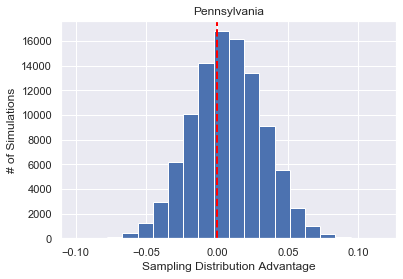

In [8]:
plt.hist(simulations, bins=20)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Pennsylvania')
plt.ylabel('# of Simulations')
plt.xlabel('Sampling Distribution Advantage')

We can fin the proportion of these simulations that predict a Trump victory? 

In [9]:
only_pos = [num for num in simulations if num >= 0]
pos_count = len(only_pos)
pos_count / 100000

0.61848

This number represents the percent chance that a given sample will correctly predict Trump's victory *even if the sample was collected with absoutely no bias*. 

**Note: Many laypeople, even well educated ones, assume that this number should be 1. After all, how could a non-biased sample be wrong? This is the type of incredibly important intuition we hope to develop in you throughout this class and your future data science coursework.**

We have just studied the sampling error, and found how our predictions might look if there was no bias in our 
sampling process. 

---
## Simulation Study of Selection Bias

According to an article by Grotenhuis, Subramanian, Nieuwenhuis, Pelzer and Eisinga (https://blogs.lse.ac.uk/usappblog/2018/02/01/better-poll-sampling-would-have-cast-more-doubt-on-the-potential-for-hillary-clinton-to-win-the-2016-election/#Author):

"In a perfect world, polls sample from the population of voters, who would state their political preference perfectly clearly and then vote accordingly."

That's the simulation study that we just performed. 


It's difficult to control for every source of selection bias.
And, it's not possible to control for some of the other sources of bias.

Next we investigate the effect of small sampling bias on the polling results. 
Specifically, we examine the impacts of a 0.5 percent bias in favor of Clinton. 
Such a bias has been suggested because highly educated voters tend to be more willing to participate in polls.

Recall, that in Pennsylvania Clinton received 47.46 percent of the votes and Trump 48.18 percent.
Clinton's lead was 47.46 - 48.18 = -0.72 percent. A 0.50 bias in the lead would yield a lead of -0.22 in
Clinton's favor. 
In other words, we use 47.71 for Clinton's percentage and 47.93 for Trump's percentage (and keep the other candidates the same). 



In [10]:
proportions_bias = [0.4793, 0.4771, 1 - (0.4818 + 0.4746)]
proportions_bias2 = [0.4818 - 0.005, 0.4747 + 0.005, 1 - (0.4818 + 0.4746) ]

In [11]:
proportions_bias2

[0.4768, 0.4797, 0.04359999999999997]

In [12]:
simulations_bias = [trump_advantage(N, proportions_bias2) for i in range(100000)] 

Text(0.5, 0, 'Sampling Distribution Advantage')

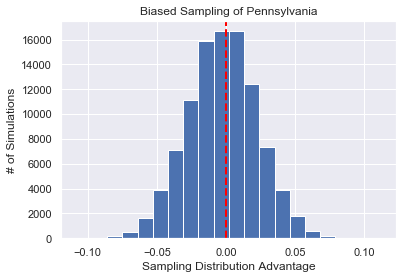

In [13]:
plt.hist(simulations_bias, bins=20)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Biased Sampling of Pennsylvania') 
plt.ylabel('# of Simulations')
plt.xlabel('Sampling Distribution Advantage')

In [14]:
only_pos = [num for num in simulations_bias if num >= 0]
pos_count = len(only_pos)
pos_count / 100000

0.46059

Both histograms are similar in shape. They are symmetric with reasonable length tails.
The second histogram is shifted slightly to the left, which shows the bias introduced in the sampling process.

###  Would increasing the sample size have helped?

When we try a sample size of 12,000 and run 100,000 simulations of a sample with replacement. What proportion of the 100,000 times is Trump predicted to win the election in the unbiased setting? In the biased setting?

In [15]:
simulations_12k = [trump_advantage(12000, proportions) for i in range(100000)] 
simulations_bias_12k = [trump_advantage(12000, proportions_bias2) for i in range(100000)] 

In [16]:
only_pos = [num for num in simulations_12k if num >= 0]
only_pos_bias = [num for num in simulations_bias_12k if num >= 0]
print(len(only_pos) / 100000, len(only_pos_bias) / 100000)

0.79192 0.37423


According to FiveThirtyEight: "... Polls of the November 2016 presidential election were about as accurate as polls of presidential elections have been on average since 1972."

When the margin of victory may be relatively small as it was in 2016, a larger sample size reduces the sampling error, but unfortunately, if there is bias, then the predictions are close to the biased estimate. If the bias pushes the prediction from one candidate (Trump) to another (Clinton), then we have a "surprise" upset. 